### site analysis

In [1]:
%load_ext autoreload
%autoreload 

In [7]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import time
from Wind.Config.Paths import wind_data_path, wind_path
import pandas as pd
import datetime
step = 300 # cada 5 min
vars = ['wind_speed', 'temperature', 'density', 'pressure', 'wind_direction']

In [3]:
dfile = '116999'

Code to read nc file and trasnform it to a dataframe

In [4]:
nc_fid = Dataset(wind_data_path + "/%s.nc" % dfile, 'r')
nint = nc_fid.dimensions['time'].size
stime = nc_fid.getncattr('start_time')
samp = nc_fid.getncattr('sample_period')
lat  = nc_fid.getncattr('latitude')
lon  = nc_fid.getncattr('longitude')
#horseheaven oregon
#hour = np.array(
#        [t.tm_hour * 60 + t.tm_min for t in [time.gmtime(stime + (i * samp)) for i in range(0, nint, step)]])
#month = np.array([t.tm_mon for t in [time.gmtime(stime + (i * samp)) for i in range(0, nint, step)]])
time_stamp = np.array([t for t in [(stime + i*300) for i in range (0, nint, 1)]])
time_stamp_datetime = pd.to_datetime(time_stamp, unit = 's')
ldata = []
for v in vars:
   data = np.nan_to_num(np.array(nc_fid.variables[v]), copy=False)
   ldata.append(data)
ldata.append(time_stamp_datetime)

cols = vars
cols.append('time_stamp')

df = pd.DataFrame(ldata)
df = df.T
df.columns = cols
df = df.set_index('time_stamp')

### Print series (6 months = 51840 steps)

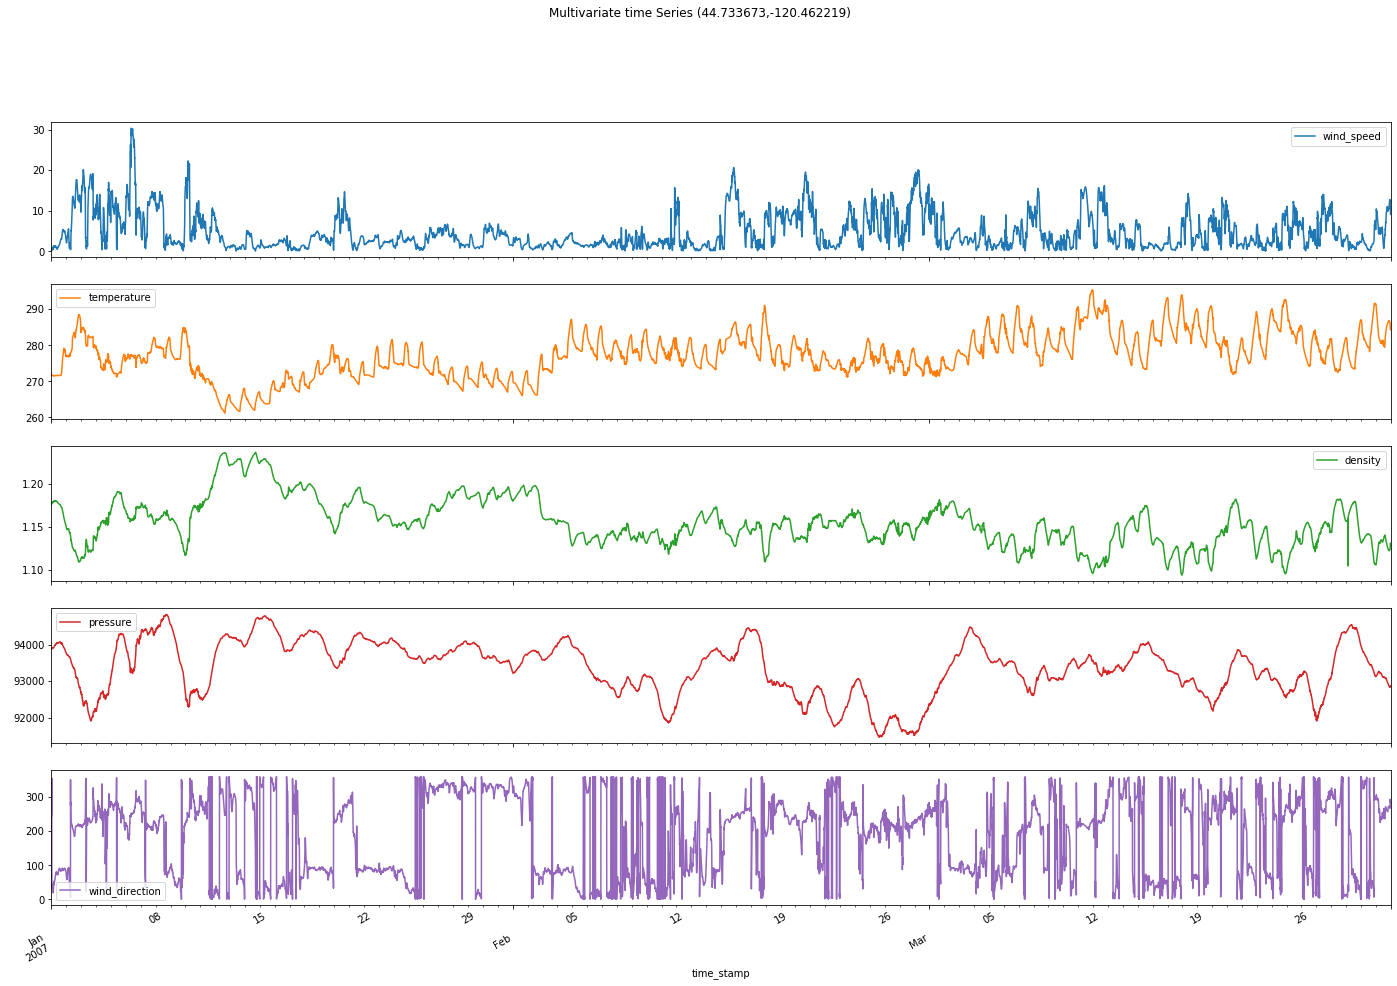

In [12]:
r = int(51840/2)
df1 = df[0:r]

ax = df1.plot(subplots=True, legend=True, figsize=(24,16), title='Multivariate time Series ('+str(lat)+','+ str(lon)+')')
fig = ax[0].get_figure()

plt.show()
#fig.savefig(dfile+'_series_plot.pdf')